# Pympler

In [1]:
from pympler import tracker

In [2]:
m = tracker.SummaryTracker()

In [3]:
m.print_diff()

                               types |   # objects |   total size
==================================== | =========== | ============
                        <class 'list |        7398 |    695.66 KB
                         <class 'str |        7399 |    531.42 KB
                         <class 'int |        1591 |     43.51 KB
                        <class 'dict |           2 |      1.12 KB
           <class 'method_descriptor |          12 |    864     B
                       <class 'tuple |           5 |    336     B
                     <class 'weakref |           3 |    240     B
            <class '_sre.SRE_Pattern |           1 |    224     B
                       <class 'bytes |           2 |    166     B
                        <class 'code |           1 |    144     B
               function (store_info) |           1 |    136     B
                        <class 'cell |           2 |     96     B
    <class 'functools._lru_list_elem |           1 |     80     B
          

In [4]:
m.print_diff()

                               types |   # objects |   total size
==================================== | =========== | ============
                        <class 'dict |           1 |    408     B
                         <class 'str |           5 |    322     B
                        <class 'list |           1 |    176     B
                     <class 'weakref |           2 |    160     B
                        <class 'type |           0 |    128     B
                       <class 'bytes |           1 |     97     B
     <class 'zmq.sugar.socket.Socket |           1 |     96     B
                      <class 'method |           1 |     64     B
                <class '_thread.lock |           1 |     40     B
                       <class 'float |           1 |     24     B
               <class 'list_iterator |          -2 |   -112     B
              <class 'sqlite3.Cursor |          -1 |   -112     B
                       <class 'tuple |          -3 |   -184     B
  <class '

In [5]:
m.print_diff()

                               types |   # objects |   total size
==================================== | =========== | ============
                       <class 'tuple |           5 |    344     B
                         <class 'str |           4 |    286     B
                        <class 'dict |           0 |    280     B
  <class 'builtin_function_or_method |           3 |    216     B
                     <class 'weakref |           2 |    160     B
              <class 'sqlite3.Cursor |           1 |    112     B
                       <class 'bytes |           1 |     97     B
                        <class 'list |           1 |     88     B
               <class 'list_iterator |           1 |     56     B
                       <class 'float |           1 |     24     B
                <class '_thread.lock |          -1 |    -40     B
                      <class 'method |          -1 |    -64     B


In [6]:
b = list(range(10**6))

In [7]:
m.print_diff()

                  types |   # objects |   total size
======================= | =========== | ============
            <class 'int |      999757 |     26.70 MB
           <class 'list |           5 |      8.58 MB
            <class 'set |           0 |      1.50 KB
           <class 'dict |           0 |    664     B
            <class 'str |           9 |    633     B
          <class 'bytes |           3 |    291     B
          <class 'tuple |           2 |    160     B
        <class 'weakref |           2 |    160     B
  <class 'list_iterator |           1 |     56     B
          <class 'float |           2 |     48     B


In [8]:
import sys

In [9]:
sys.getrefcount(1000)

3

In [10]:
sys.getrefcount(3)

1050

In [11]:
sys.getrefcount(0)

5976

In [12]:
sys.getsizeof(3)

28

In [13]:
del b

In [14]:
m.print_diff()

                                                types |   # objects |   total size
===================================================== | =========== | ============
                                         <class 'dict |          47 |     15.53 KB
                                          <class 'str |          29 |      1.96 KB
                             <class '_sre.SRE_Pattern |           6 |      1.69 KB
                                        <class 'bytes |          13 |      1.23 KB
                                      <class 'weakref |           7 |    560     B
                     <class 'functools._lru_list_elem |           6 |    480     B
                   <class 'builtin_function_or_method |           6 |    432     B
                                        <class 'tuple |           5 |    424     B
                                         <class 'type |           0 |    408     B
                                        <class 'float |           7 |    168     B
    

In [15]:
cd measuring/

/Users/mike/pycon2017/measuring


In [17]:
# %load memory_size_pympler.py
# file: memory_size_pympler.py

"""Measure the size of used memory with a decorator.
"""

from __future__ import print_function

import functools                                                #1
import sys

if sys.version_info.major < 3:
    range = xrange

from pympler import tracker                                     #2

memory = {}                                                     #3


def measure_memory(function):                                   #4
    """Decorator to measure memory size.
    """

    @functools.wraps(function)                                  #5
    def _measure_memory(*args, **kwargs):                       #6
        """This replaces the function that is to be measured.
        """
        measurer = tracker.SummaryTracker()                     #7
        for _ in range(2):                                      #8
            measurer.diff()                                     #9
        try:
            res = function(*args, **kwargs)                     #10
            return res
        finally:                                                #11
            memory[function.__name__] = (measurer.diff())
    return _measure_memory                                      #12


if __name__ == '__main__':

    @measure_memory                                             #13
    def make_big(number):
        """Example function that makes a large list.
        """
        return list(range(number))                              #14

    make_big(int(1e6))                                          #15
    print('used memory', memory)                                #16


used memory {'make_big': [["<class 'int", 999757, 27993196], ["<class 'list", 1, 9000112]]}


In [18]:
b = list(range(10**6))

In [19]:
sys.getsizeof(b)

9000112

In [22]:
# %load memory_growth_pympler.py
# file memory_growth_pympler.py

"""Measure the memory growth during a function call.
"""
from __future__ import print_function

import sys

if sys.version_info.major < 3:
    range = xrange

from pympler import tracker                                     #1


def check_memory_growth(function, *args, **kwargs):             #2
    """Measure the memory usage of `function`.
    """
    measurer = tracker.SummaryTracker()                         #3
    for _ in range(2):                                          #4
        measurer.diff()                                         #5
    function(*args, **kwargs)                                   #6
    return measurer.diff()                                      #7

if __name__ == '__main__':

    def test():
        """Do some tests with different memory usage patterns.
        """

        def make_big(number):                                   #8
            """Function without side effects.

            It cleans up all used memory after it returns.
            """
            return list(range(number))

        data = []                                               #9

        def grow(number):
            """Function with side effects on global list.
            """
            for x in range(number):
                data.append(x)                                  #10
        size = int(1e6)
        print('memory make_big:', check_memory_growth(make_big,
                                                      size))     #11
        print('memory grow:', check_memory_growth(grow, size))   #12

    test()


memory make_big: []
memory grow: [["<class 'int", 999743, 27992804], ["<class 'list", 0, 8697400]]


In [24]:
# %load pympler_list_growth.py
# file: pympler_list_growth.py

"""Measure the size of a list as it grows.
"""
from __future__ import print_function

import sys

from pympler.asizeof import asizeof, flatsize


if sys.version_info.major < 3:
    range = xrange


def list_mem(length, size_func=flatsize):
    """Measure incremental memory increase of a growing list.
    """
    my_list = []
    mem = [size_func(my_list)]
    for elem in range(length):
        my_list.append(elem)
        mem.append(size_func(my_list))
    return mem


if __name__ == '__main__':

    def main():
        """Show plot or numbers.
        """
        SIZE = 1000
        SHOW = 20

        for func in [flatsize, asizeof, sys.getsizeof]:
            mem = list_mem(SIZE, size_func=func)
            try:
                from matplotlib import pylab
                pylab.plot(mem)
                pylab.show()
            except ImportError:
                print('matplotlib seems not be installed. Skipping the plot.')
                if SIZE > SHOW:
                    limit = SHOW // 2
                    print(mem[:limit],
                          '... skipping %d elements ...' % (SIZE - SHOW),
                          end='')
                    print(mem[-limit:])
                else:
                    print(mem)


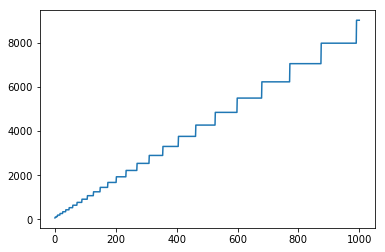

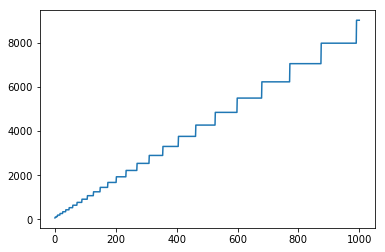

In [27]:
main()

In [26]:
%matplotlib inline

In [29]:
# %load list_alloc_steps.py
# file: list_alloc_steps.py

"""Measure the number of memory allocation steps for a list.
"""
from __future__ import print_function

import sys

if sys.version_info.major < 3:
    range = xrange

from pympler.asizeof import flatsize


def list_steps(lenght, size_func=sys.getsizeof):
    """Measure the number of memory alloaction steps for a list.
    """
    my_list = []
    steps = 0
    int_size = size_func(int())
    old_size = size_func(my_list)
    for elem in range(lenght):
        my_list.append(elem)
        new_size = sys.getsizeof(my_list)
        if new_size - old_size > int_size:
            steps += 1
        old_size = new_size
    return steps


if __name__ == '__main__':
    steps = [10, 100, 1000, 10000, int(1e5), int(1e6), int(1e7)]
    print('Using sys.getsizeof:')
    for size in steps:
        print('%10d: %3d' % (size, list_steps(size)))
    print('Using pympler.asizeof.flatsize:')
    for size in steps:
        print('%10d: %3d' % (size, list_steps(size, flatsize)))


Using sys.getsizeof:
        10:   3
       100:  10
      1000:  27
     10000:  46
    100000:  65
   1000000:  85
  10000000: 104
Using pympler.asizeof.flatsize:
        10:   3
       100:  10
      1000:  27
     10000:  46
    100000:  65
   1000000:  85
  10000000: 104


# Memory Profiler by Line

In [ ]:
# %load use_mem.py
# file: use_mem.py

import random
import sys

# Make it work with Python 2 and Python 3.
if sys.version_info.major < 3:
    range = xrange


@profile
def use_mem(numbers):
    """Different ways to use up memory.
    """
    a = sum([x * x for x in numbers])
    b = sum(x * x for x in numbers)
    c = sum(x * x for x in numbers)
    squares = [x * x for x in numbers]
    d = sum(squares)
    del squares
    x = 'a' * int(1e6)
    del x
    return 42


if __name__ == '__main__':

    numbers = [random.random() for x in range(int(1e6))]
    use_mem(numbers)

In [31]:
%load_ext memory_profiler

In [34]:
# %load use_mem.py
# file: use_mem.py

import random
import sys

# Make it work with Python 2 and Python 3.
if sys.version_info.major < 3:
    range = xrange


def use_mem(numbers):
    """Different ways to use up memory.
    """
    a = sum([x * x for x in numbers])
    b = sum(x * x for x in numbers)
    c = sum(x * x for x in numbers)
    squares = [x * x for x in numbers]
    d = sum(squares)
    del squares
    x = 'a' * int(1e6)
    del x
    return 42


if __name__ == '__main__':

    numbers = [random.random() for x in range(int(1e6))]
    use_mem(numbers)

In [35]:
%mprun -f use_mem use_mem(numbers)

ERROR: Could not find file <ipython-input-34-c072dc726ebd>
NOTE: %mprun can only be used on functions defined in physical files, and not in the IPython environment.

